In [1]:
#importing required Libraries

In [112]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk

from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC , LinearSVC


from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

import pickle  



In [217]:
df=pd.read_csv('cyberbullying_tweets.csv')

In [218]:
# Initial Review

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [220]:
df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [221]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [118]:
# Checking Missing Valuues

In [222]:
df.isnull().sum() #no missing values!

tweet_text            0
cyberbullying_type    0
dtype: int64

In [223]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [224]:
#renaming

In [225]:
#Cleaning and Data Processing

In [227]:
df=df.rename(columns={
    'tweet_text':'text','cyberbullying_type':'sentiment'
})

In [228]:
df.head()

,text,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [246]:
df['sentiment_encoded']=df['sentiment'].replace({
    'religion':1,
    'age':2,
    'ethnicity':3,
    'gender':4,
    'other_cyberbullying':5,
    'not_cyberbullying':6
})

In [247]:
df.tail()

,text,sentiment,sentiment_encoded,cleaned_text
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,3,black ppl expect anyth depend anyth yet free p...
47688,Turner did not withhold his disappointment. Tu...,ethnicity,3,turner withhold disappoint turner call court a...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,3,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,3,yea fuck rt your nigger fuck unfollow fuck dum...
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,3,bro u got ta chill rt dog fuck kp dumb nigger ...




Punkt is a pre-trained unsupervised machine learning tokenizer that can split text into sentences and words. It does not rely on predefined lists of tokens or regular expressions; instead, it uses an unsupervised algorithm to learn the boundaries of sentences and words.

In [248]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubhankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [249]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubhankit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

WordNet is an extensive semantic lexicon for the English language. It organizes words into sets of synonyms (synsets), each representing a distinct concept. Additionally, WordNet records various semantic relationships between these synonym sets.

In [250]:
stop_words = set(stopwords.words('english'))

In [251]:
### Preprocessing of text

In [252]:
#function to remove emojis

def strip_emoji(text):
    return emoji.replace_emoji(text,replace="")

In [253]:
# function to convert text to lowercase, remove (unwanted characrters , ursl , non-utf stuff , numbers , stopwrors)


def strip_all_entities(text):
    
    text= text.replace('\r', '').replace('\n','').lower()
    
    text= re.sub(r"(?:\@|https?|-\://)\S+",'',text)
    text= re.sub(r"[^\x00-\x7f]",r'',text)
    text= re.sub('[0-9]+','',text)
    
    stopchars =string.punctuation
    table=str.maketrans('','',stopchars)
    text=text.translate(table)
    
    text=[word for word in text.split() if word not in stop_words]
    text=' '.join(text)
    
    return text

In [254]:
#function to remove contractions

In [255]:
def decontract(text):
    
    text=re.sub(r"cant\'t'" ,"can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text

In [256]:
#function to clean hastags

def clean_hashtags(tweet):
    
    new_tweet=" ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    
    return new_tweet2

In [257]:
#function to filter special charaters

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [258]:
# removing sequesces , and appluing stemming

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)




def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [141]:
# using all functions

def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    text = lemmatize(text)
    return text

In [240]:
df['cleaned_text'] = df['text'].apply(preprocess)
df.head()

,text,sentiment,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,isi account pretend kurdish account like islam...


In [143]:
#dealing with duplicates

In [259]:
df['cleaned_text'].duplicated().sum()

0

In [260]:
df.drop_duplicates('cleaned_text',inplace=True)

In [261]:
#tokenization

In [262]:
df['tweet_list']=df['cleaned_text'].apply(word_tokenize)

df.head()

,text,sentiment,sentiment_encoded,cleaned_text,tweet_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya..."
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like..."


In [148]:
#EDA

In [149]:
#checking lenght of varios tweet text

In [263]:
text_len = []
for text in df.tweet_list:
    tweet_len = len(text)
    text_len.append(tweet_len)
df['text_len'] = text_len

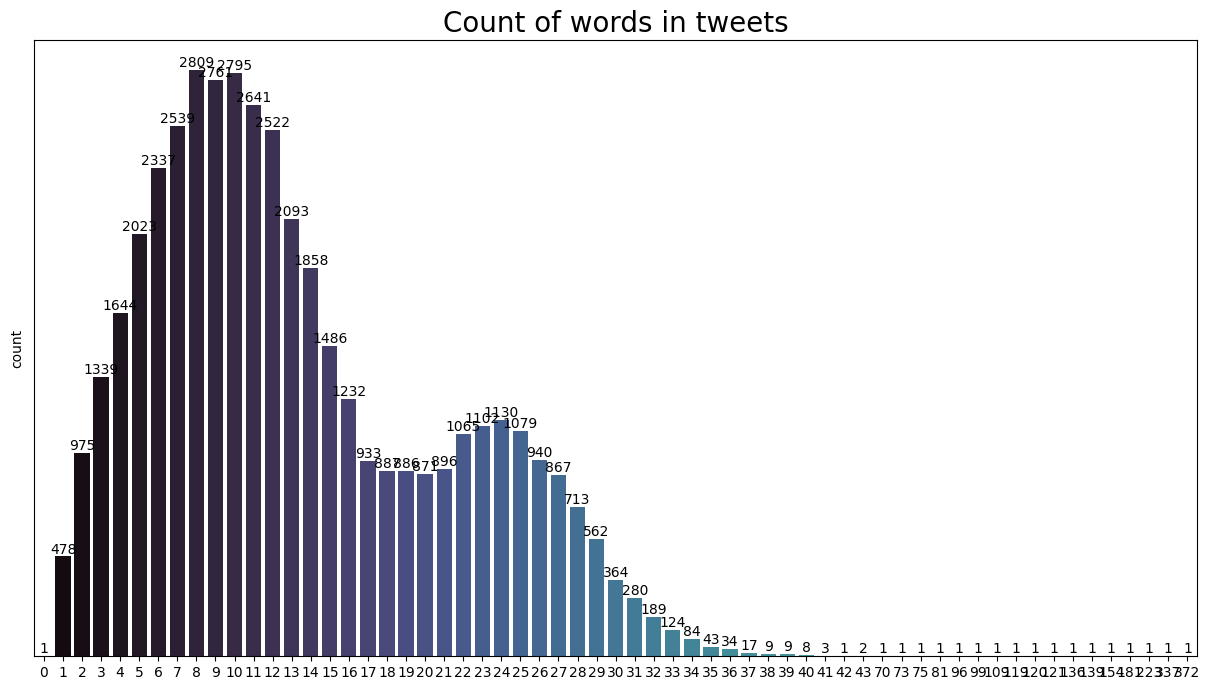

In [264]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='text_len', data=df, palette='mako')
plt.title('Count of words in tweets', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [265]:
#removing text without words

In [266]:
df = df[df['text_len']!=0]

In [267]:
df.shape

(44647, 6)

In [154]:
#function to create a word cloud

def plot_wordcloud(cyberbullying_type):
    string = ""
    for i in df[df.sentiment == cyberbullying_type].cleaned_text.values:
        string = string + " " + i.strip()

#     custom_mask = np.array(Image.open('/kaggle/input/twitter-image/twitter.png'))
#     mask_colors = ImageColorGenerator(custom_mask)
    wordcloud = WordCloud(background_color ='white',max_words=2000, max_font_size=256,
               random_state=42).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cyberbullying_type)
    plt.show()
    del string

In [155]:
#splitting data based on sentiment for EDA

In [268]:
not_cyberbullying_type = df[df['sentiment']=='not_cyberbullying']
gender_type = df[df['sentiment']=='gender']
religion_type = df[df['sentiment']=='religion']
other_cyberbullying_type = df[df['sentiment']=='other_cyberbullying']
age_type = df[df['sentiment']=='age']
ethnicity_type = df[df['sentiment']=='ethnicity']

In [269]:
#EDA

In [270]:
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top20_gender = pd.DataFrame(gender.most_common(20))
top20_gender.columns = ['Top Words','Count']
top20_gender.head(20)

,Top Words,Count
0,joke,5179
1,rape,4070
2,gay,3852
3,call,1401
4,make,1284
5,rt,1219
6,woman,1182
7,bitch,1145
8,femal,1108
9,peopl,988


Text(0.5, 1.0, 'Top 20 words in Gender Cyberbullying')

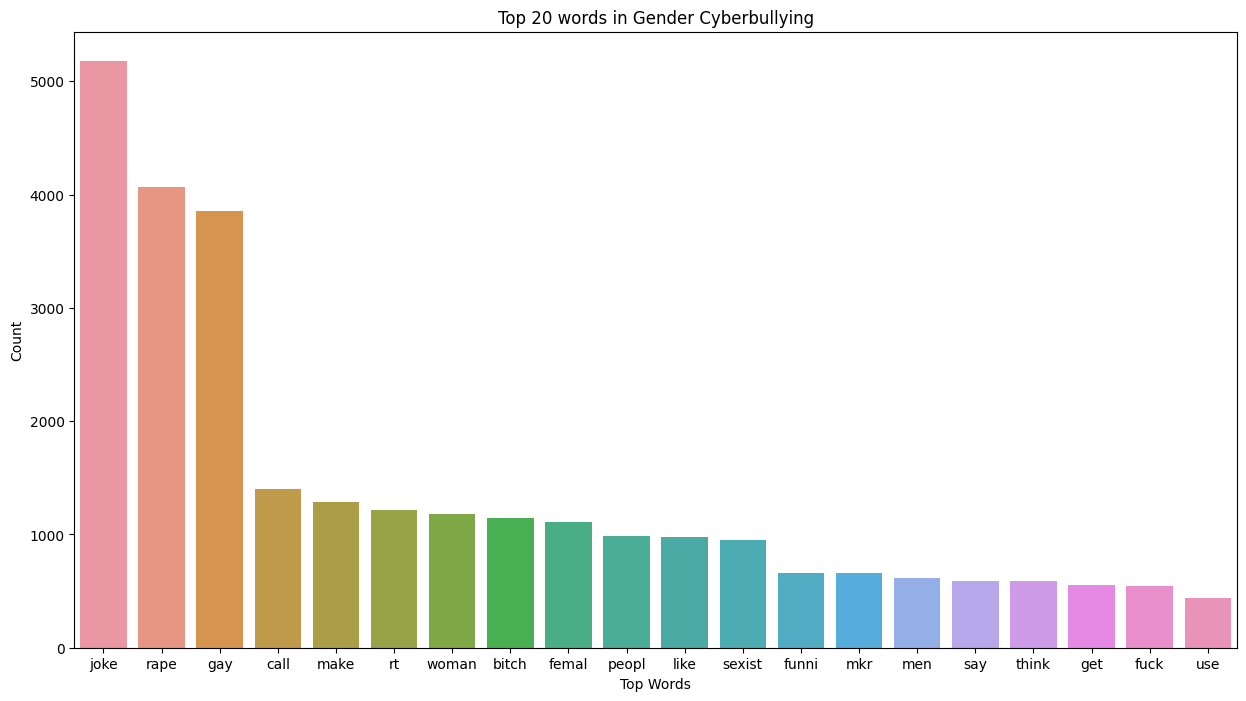

In [159]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_gender, y="Count", x="Top Words")
plt.title("Top 20 words in Gender Cyberbullying")

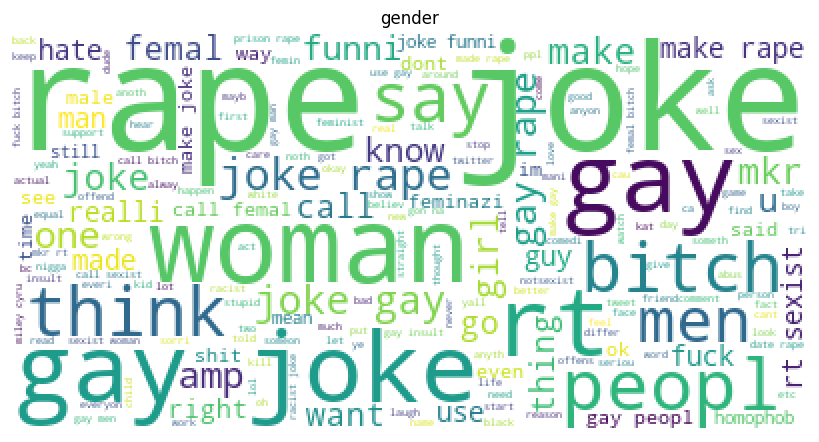

In [160]:
plot_wordcloud('gender')

In [161]:
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
top20_religion = pd.DataFrame(religion.most_common(20))
top20_religion.columns = ['Top Words','Count']
top20_religion.style.background_gradient(cmap='Greens')

,Top Words,Count
0,muslim,4618
1,idiot,3075
2,islam,2440
3,christian,2132
4,u,1922
5,terrorist,1378
6,right,1290
7,like,1276
8,support,1250
9,woman,1247


Text(0.5, 1.0, 'Top 20 words in Religion Cyberbullying')

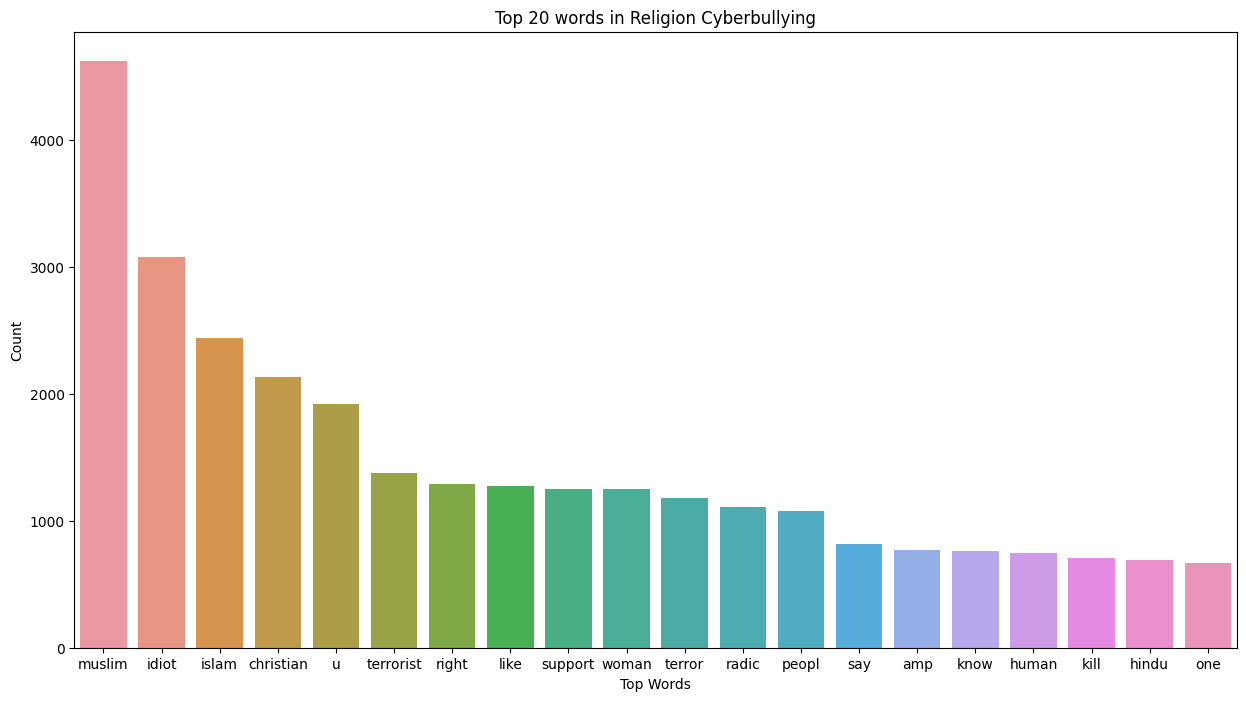

In [162]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_religion, y="Count", x="Top Words")
plt.title("Top 20 words in Religion Cyberbullying")

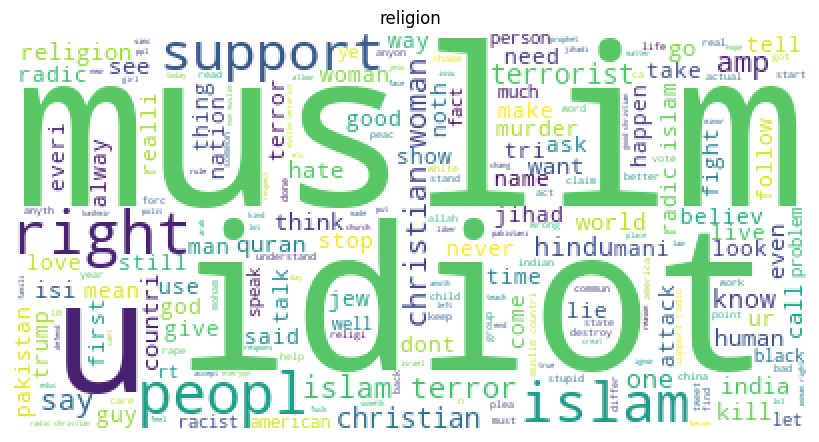

In [163]:
plot_wordcloud('religion')

In [164]:
#age based cyber bulllying

In [165]:
age = Counter([item for sublist in age_type['tweet_list'] for item in sublist])
top20_age = pd.DataFrame(age.most_common(20))
top20_age.columns = ['Top Words','Count']
top20_age.style.background_gradient(cmap='Greens')

,Top Words,Count
0,bulli,8902
1,school,8428
2,high,4861
3,girl,4616
4,like,2080
5,get,1052
6,one,1044
7,peopl,934
8,got,842
9,kid,809


Text(0.5, 1.0, 'Top 20 words in Age Cyberbullying')

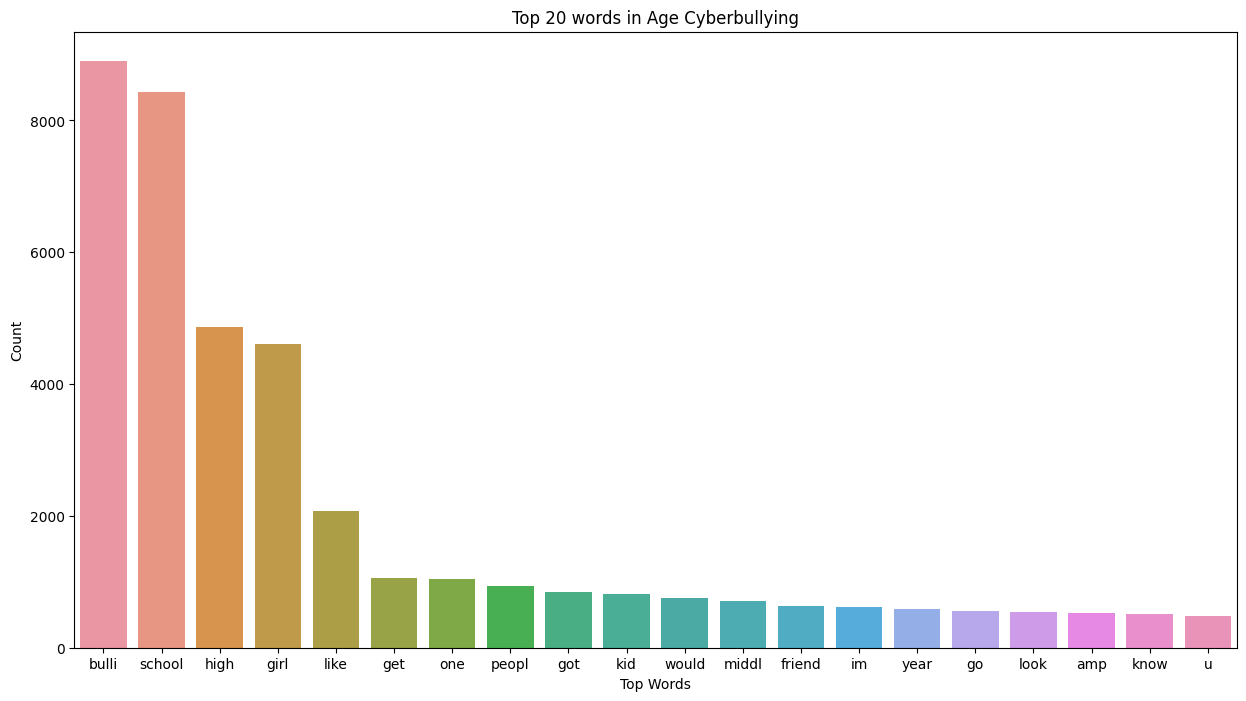

In [166]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_age, y="Count", x="Top Words")
plt.title("Top 20 words in Age Cyberbullying")

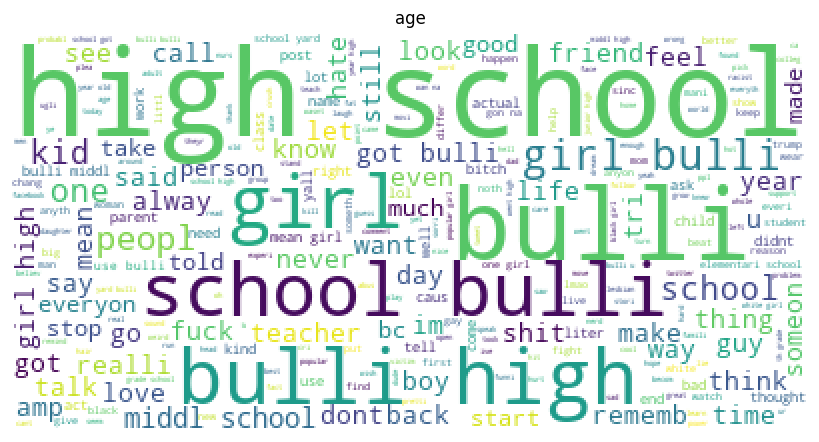

In [167]:
plot_wordcloud('age')

In [168]:
#ethnicity based cyber bullying

In [169]:
ethnicity = Counter([item for sublist in ethnicity_type['tweet_list'] for item in sublist])
top20_ethnicity = pd.DataFrame(ethnicity.most_common(20))
top20_ethnicity.columns = ['Top Words','Count']
top20_ethnicity.style.background_gradient(cmap='Greens')

,Top Words,Count
0,fuck,5889
1,nigger,5457
2,dumb,5002
3,as,2241
4,black,2134
5,u,2105
6,white,1557
7,call,1381
8,peopl,1182
9,rt,1164


Text(0.5, 1.0, 'Top 20 words in Ethnicity Cyberbullying')

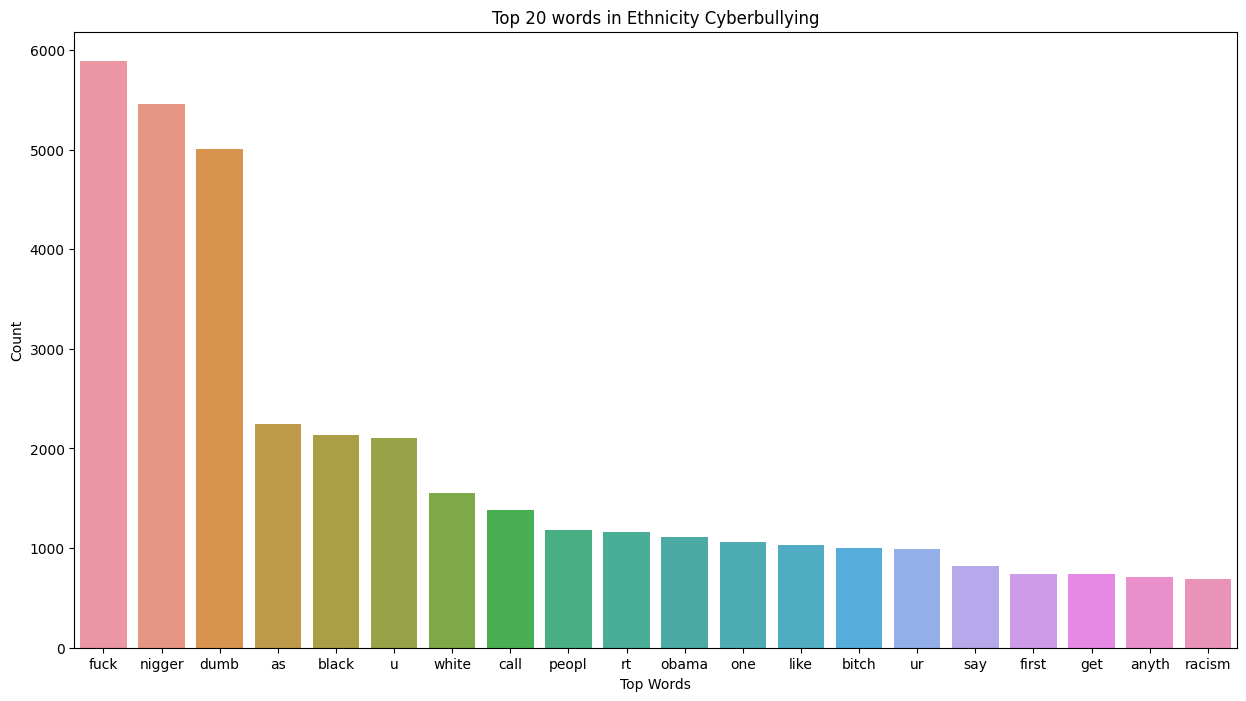

In [170]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_ethnicity, y="Count", x="Top Words")
plt.title("Top 20 words in Ethnicity Cyberbullying")

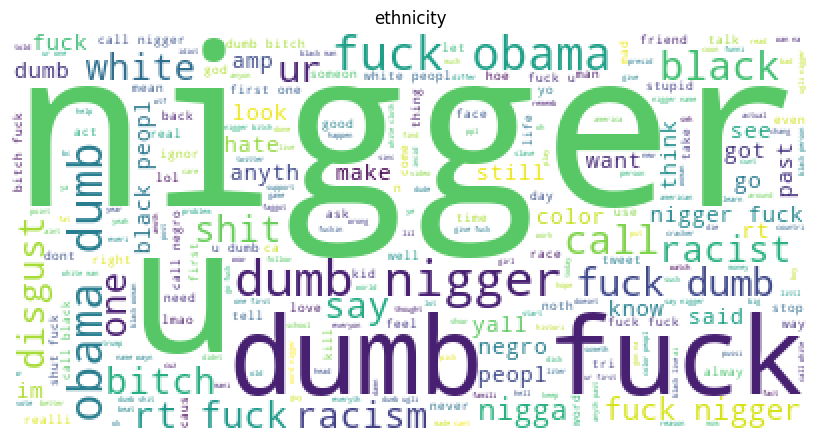

In [171]:
plot_wordcloud('ethnicity')


In [172]:
other_cyberbullying = Counter([item for sublist in other_cyberbullying_type['tweet_list'] for item in sublist])
top20_other_cyberbullying = pd.DataFrame(other_cyberbullying.most_common(20))
top20_other_cyberbullying.columns = ['Top Words','Count']
top20_other_cyberbullying.style.background_gradient(cmap='Greens')

,Top Words,Count
0,bulli,881
1,rt,718
2,fuck,509
3,like,423
4,get,393
5,peopl,352
6,go,277
7,idiot,260
8,know,241
9,think,237


Text(0.5, 1.0, 'Top 20 words in Other Cyberbullying')

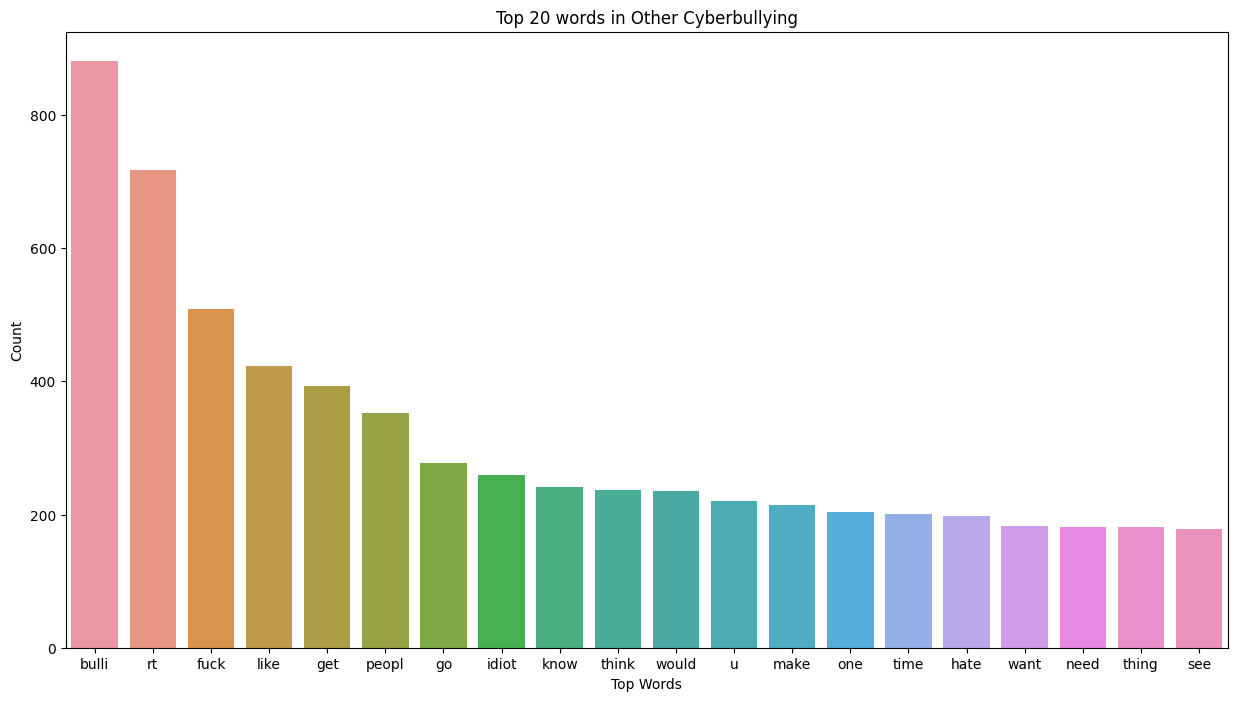

In [173]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_other_cyberbullying, y="Count", x="Top Words")
plt.title("Top 20 words in Other Cyberbullying")

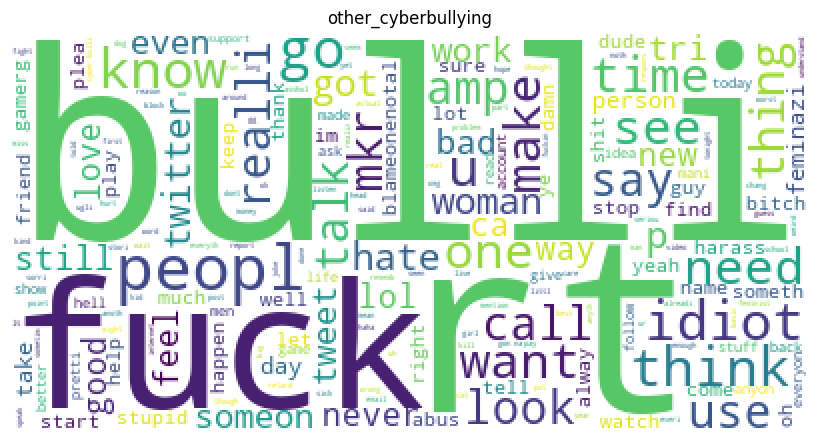

In [174]:
plot_wordcloud('other_cyberbullying')

In [175]:
#tweets with no cyber bullying

In [176]:
not_cyberbullying = Counter([item for sublist in not_cyberbullying_type['tweet_list'] for item in sublist])
top20_not_cyberbullying = pd.DataFrame(not_cyberbullying.most_common(20))
top20_not_cyberbullying.columns = ['Top Words','Count']
top20_not_cyberbullying.style.background_gradient(cmap='Greens')

,Top Words,Count
0,mkr,1667
1,bulli,1101
2,rt,781
3,like,424
4,get,423
5,go,394
6,school,374
7,kat,286
8,would,286
9,peopl,272


Text(0.5, 1.0, 'Top 20 words in Not Cyberbullying')

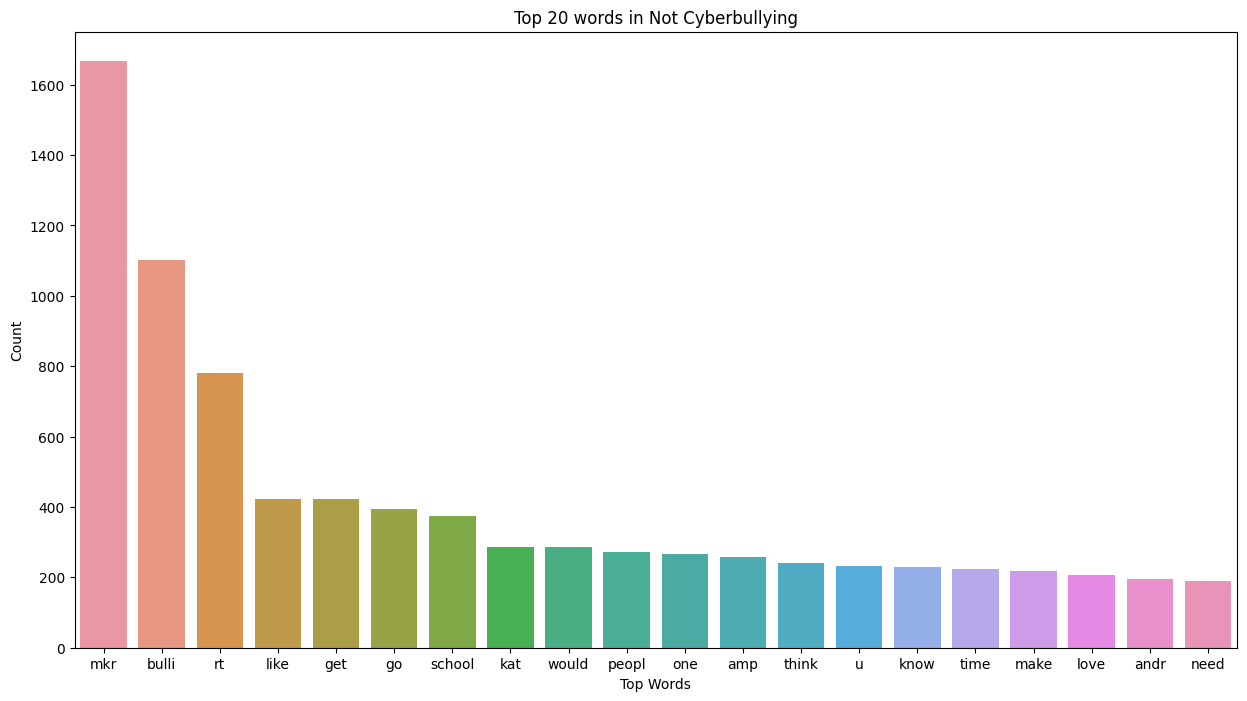

In [177]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_not_cyberbullying, y="Count", x="Top Words")
plt.title("Top 20 words in Not Cyberbullying")

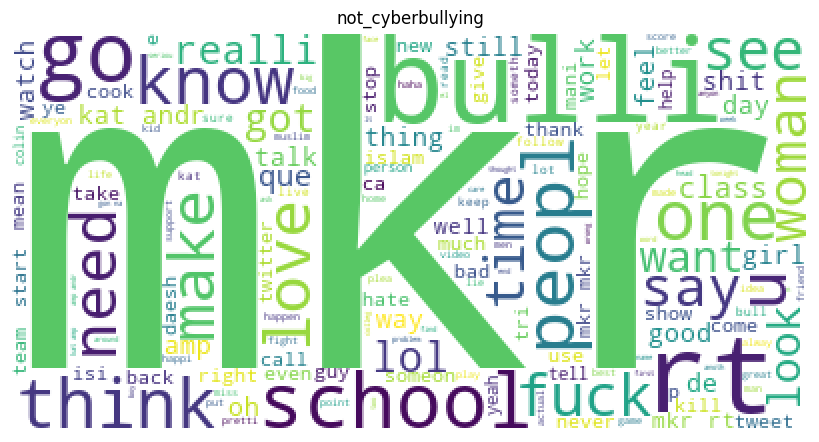

In [178]:
plot_wordcloud('not_cyberbullying')

In [179]:
df.head()

,text,sentiment,sentiment_encoded,cleaned_text,tweet_list,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,word katandandr food crapilici mkr,"[word, katandandr, food, crapilici, mkr]",5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,aussietv white mkr theblock imacelebrityau tod...,"[aussietv, white, mkr, theblock, imacelebritya...",11
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,classi whore red velvet cupcak,"[classi, whore, red, velvet, cupcak]",5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,meh p thank head concern anoth angri dude twitter,"[meh, p, thank, head, concern, anoth, angri, d...",9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,isi account pretend kurdish account like islam...,"[isi, account, pretend, kurdish, account, like...",8


In [180]:
sentiments = ["religion", "age", "ethnicity", "gender", "other_cyberbullying","not_cyberbullying"]

In [181]:
#Modelling 

In [182]:
# splitting data in test and train

In [183]:
X,Y = df['cleaned_text'],df['sentiment_encoded']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify =Y, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(31252,) (31252,) (13395,) (13395,)


In [185]:
#tf - idf vectorization

In [273]:
X_train

17423    hey guy publish first post blog closet gay chr...
4399                                         new book yiii
23916                          fyi look like caught botter
27178          play cat get surpris brother coon main play
30445    mean go ahead play get basic bulli daft old ma...
                               ...                        
42704    fuck nigger st date hope last forev supah dumb...
32187    share bulli quirkynerd high school obviou bull...
14036    oh plenti pick rotten low hang sexist fruit ta...
33441    how girl gon na say bulli high school wasnt li...
39289                    cancel she high school fuck bulli
Name: cleaned_text, Length: 31252, dtype: object

In [274]:


tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(31252, 29088)
(13395, 29088)


In [278]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tf_idf, f)

In [279]:
print(X_train_tf)

  (0, 20985)	0.18932417561171402
  (0, 17031)	0.1785786094320122
  (0, 27667)	0.21351368842084856
  (0, 25370)	0.19748955543123045
  (0, 21598)	0.1448696436528264
  (0, 1314)	0.25891372020256215
  (0, 24631)	0.1592008609762439
  (0, 15107)	0.16455997593358335
  (0, 28733)	0.16361603824119003
  (0, 24384)	0.26521888006565575
  (0, 24310)	0.21351368842084856
  (0, 28318)	0.1354997700447077
  (0, 4557)	0.14885251668963956
  (0, 9676)	0.1231305568799235
  (0, 4812)	0.2944610856122716
  (0, 2945)	0.2746238625078153
  (0, 19841)	0.3966661082547874
  (0, 8855)	0.16402339535897462
  (0, 20366)	0.2944610856122716
  (0, 10576)	0.1675507679830353
  (0, 11224)	0.2183936240017642
  (1, 28813)	0.7909943489733166
  (1, 3111)	0.45699637757922923
  (1, 17376)	0.40679509678920833
  (2, 3184)	0.6446362887674282
  :	:
  (31250, 26124)	0.28178080657107063
  (31250, 6196)	0.30543011455363633
  (31250, 9053)	0.2322317878949997
  (31250, 18898)	0.42013227422435395
  (31250, 16709)	0.21303485560390129
  (31250

In [280]:
#trying different models

In [282]:
#Logistics

log_reg = LogisticRegression()

In [283]:
log_cv_score = cross_val_score(log_reg,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)

In [284]:
mean_log_cv = np.mean(log_cv_score)
mean_log_cv

0.8243893776030031

In [285]:
#support vector

In [286]:
lin_svc = LinearSVC()

In [287]:
lin_svc_cv_score = cross_val_score(lin_svc,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_lin_svc_cv = np.mean(lin_svc_cv_score)
mean_lin_svc_cv

0.8223403815766298

In [288]:
#naive bayes classifier

In [289]:
multiNB = MultinomialNB()

In [290]:
multiNB_cv_score = cross_val_score(multiNB,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_multiNB_cv = np.mean(multiNB_cv_score)
mean_multiNB_cv

0.6738180532205447

In [291]:
#decision tree classifier

In [292]:
dtree = DecisionTreeClassifier()

In [293]:
dtree_cv_score = cross_val_score(dtree,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_dtree_cv = np.mean(dtree_cv_score)
mean_dtree_cv

0.8065217075299944

In [294]:
#random forest classifier

In [295]:
rand_forest = RandomForestClassifier()

In [296]:
rand_forest_cv_score = cross_val_score(rand_forest,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_rand_forest_cv = np.mean(rand_forest_cv_score)
mean_rand_forest_cv

0.8296326866437338

In [297]:
#ada boost classifier

In [298]:
adab=AdaBoostClassifier()

In [299]:
adab_cv_score = cross_val_score(adab,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_adab_cv = np.mean(adab_cv_score)
mean_adab_cv

0.7603056606123498

In [300]:
#By trying different models we can see logistic regression, svm and random forest classifier performed similarly, so among these we will go with svm model as it is more generalised and light

In [301]:
#tuning SVC

In [304]:
svc1 = LinearSVC()
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],
             'loss':['hinge','squared_hinge'],
             'fit_intercept':[True,False]}
grid_search = GridSearchCV(svc1,param_grid,cv=5,scoring='f1_macro',n_jobs=-1,verbose=0,return_train_score=True)
grid_search.fit(X_train_tf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge']},
             return_train_score=True, scoring='f1_macro')

In [305]:
grid_search.best_estimator_

LinearSVC(C=1, loss='hinge')

In [306]:
grid_search.best_score_

0.8258663266864932

In [307]:
#evalutaion

lin_svc.fit(X_train_tf,y_train)

y_pred = lin_svc.predict(X_test_tf)

In [308]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(lin_svc, f)

In [309]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

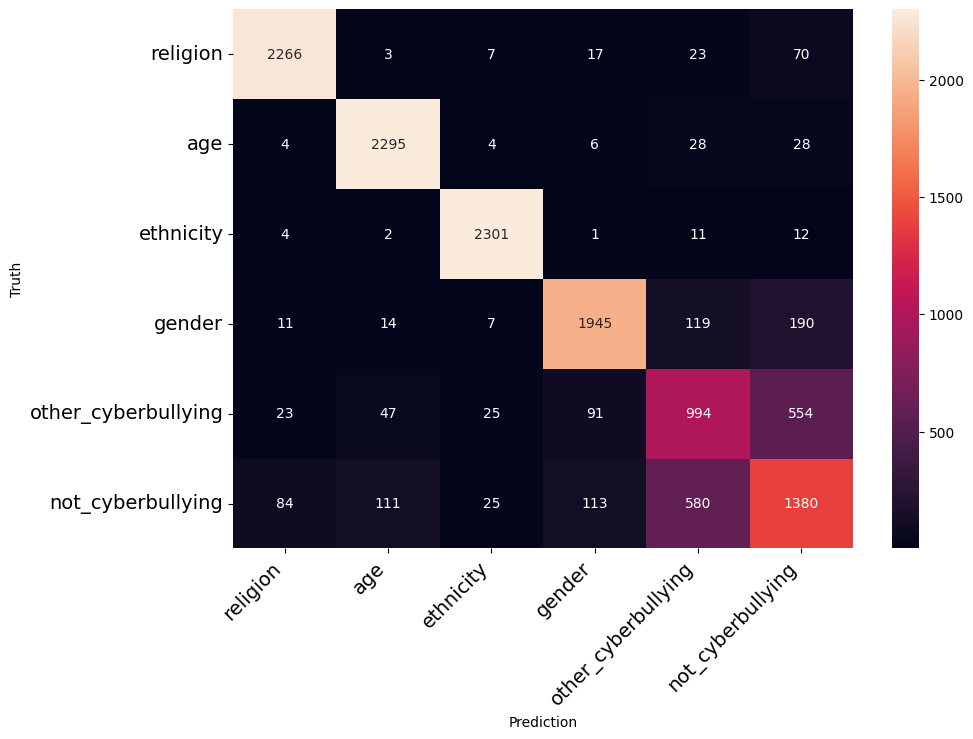

In [310]:
cm = confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,sentiments)

In [216]:
print('Classification Report:\n',classification_report(y_test, y_pred, target_names=sentiments))

Classification Report:
                      precision    recall  f1-score   support

           religion       0.95      0.95      0.95      2386
                age       0.93      0.97      0.95      2365
          ethnicity       0.97      0.99      0.98      2331
             gender       0.90      0.85      0.87      2286
other_cyberbullying       0.57      0.57      0.57      1734
  not_cyberbullying       0.62      0.60      0.61      2293

           accuracy                           0.83     13395
          macro avg       0.82      0.82      0.82     13395
       weighted avg       0.83      0.83      0.83     13395

